### Inverse Square root

Here we test accuracy of Inverse Square Root algorithm.

References:
* [Paper](https://arxiv.org/pdf/1805.12445).
* Exact algorithm description: [notebook](../classic/inv_sqrt.ipynb).
* Implementation: [inv_sqrt.py](../../qmath/func/inv_sqrt.py).

Parameters: 5 iterations, register of size 50 with radix=45.

In [7]:
from qmath.func.inv_sqrt import _InitialGuess, _NewtonIteration, InverseSquareRoot
from qmath.utils.test_utils import QPUTestHelper
from psiqworkbench import QPU, QFixed
from psiqworkbench.filter_presets import BIT_DEFAULT

import numpy as np
from matplotlib import pyplot as plt

qpu_helper = QPUTestHelper(num_qubits=2000, qubits_per_reg=50, radix=40)
func = InverseSquareRoot(num_iterations=5)
func.compute(qpu_helper.inputs[0])
qpu_helper.record_op(func.get_result_qreg())

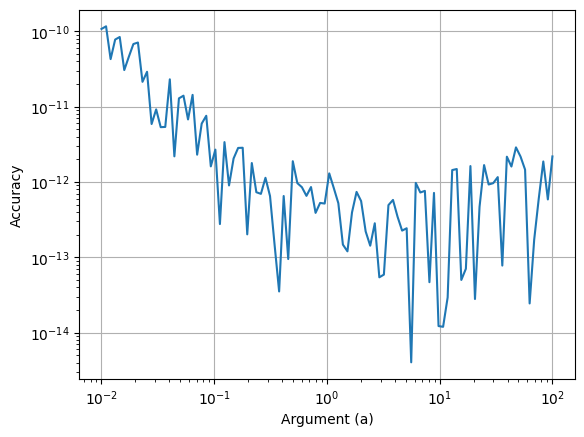

In [12]:
a_range = 10**np.linspace(-2, 2, 100)
diffs = [np.abs(qpu_helper.apply_op([a]) - (a**-0.5)) for a in a_range]

plt.plot(a_range, diffs)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Argument (a)')
plt.ylabel('Accuracy')
plt.grid()
